In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pytest
import ipytest
from random import randint

# Area of arbitrary closed polygon

In [47]:
def shoelace(points: np.ndarray):
    points = np.append(points, points[0]).reshape(-1, 2)
    area = 0
    for index in range(len(points)-1):
        matrix = points[index:index+2, :].T
        area += np.linalg.det(matrix)
    return np.round(area/2, 5)

def test_shoelace():
    points = np.array(
        [
            [1, 6],
            [3, 1],
            [7, 2],
            [4, 4],
            [8, 5],
        ]
    )

    assert shoelace(points) == 16.5

    points = np.array(
        [
            [0, 0],
            [1, 0],
            [1, 1],
            [0, 1],
        ]
    )

    assert shoelace(points) == 1.0

In [48]:
ipytest.run()

======================================= test session starts ========================================
platform darwin -- Python 3.10.9, pytest-7.2.1, pluggy-1.0.0
Matplotlib: 3.6.3
Freetype: 2.6.1
rootdir: /Users/sylvi/Documents/TopoStats, configfile: pyproject.toml
plugins: xdist-3.1.0, regtest-1.5.0, mpl-0.16.1, cov-4.0.0, anyio-3.6.2
collected 1 item

t_84d2eb3ca77142dca8c23141b5ab671e.py .                                                      [100%]WARNING: Failed to generate report: No data to report.



---------- coverage: platform darwin, python 3.10.9-final-0 ----------


======================================== 1 passed in 0.02s =========================================


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/coverage/report.py:114: CoverageWarning: Couldn't parse '/private/var/folders/sr/wjtfqr9s6x3bw1s647t649x80000gn/T/ipykernel_1345/1405329698.py': No source for code: '/private/var/folders/sr/wjtfqr9s6x3bw1s647t649x80000gn/T/ipykernel_1345/1405329698.py'. (couldnt-parse)
  coverage._warn(msg, slug="couldnt-parse")
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/pytest_cov/plugin.py:311: CovReportWarning: Failed to generate report: No data to report.

  warnings.warn(CovReportWarning(message))


<ExitCode.OK: 0>

16.5


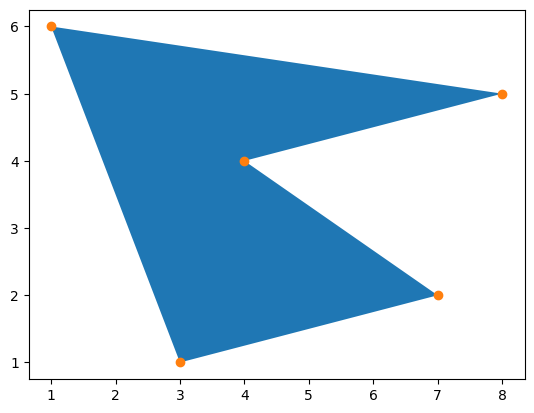

In [40]:
points = np.array(
    [
        [1, 6],
        [3, 1],
        [7, 2],
        [4, 4],
        [8, 5],
    ]
)

plt.fill(points[:, 0], points[:, 1])
plt.scatter(x=points[:, 0], y=points[:, 1])

area = shoelace(points)
print(np.round(area, 5))


# Perimeter of arbitrary closed loop of points

In [94]:
def polygon_perimeter(points: np.ndarray):
    points = np.append(points, points[0]).reshape(-1, 2)
    perimeter = 0
    for i in range(len(points)-1):
        point1 = points[i, :]
        point2 = points[i+1, :]
        perimeter += np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)
    return perimeter

def test_perimeter():
    points = np.array([[0, 0], [0, 1], [1, 1], [1, 0]])
    perimeter = polygon_perimeter(points)
    assert perimeter == 4.0

# Separations of points

In [78]:
from scipy.spatial import distance
def point_distances(points: np.ndarray):
    distance_matrix = distance.cdist(points, points, 'euclidean')
    distances = distance_matrix[np.triu_indices(points.shape[0], k=1)]
    return np.round(distances, 5)

def test_point_distances():
    points = np.array(
        [
            [0, 0],
            [0, 1],
            [1, 0],
            [1, 1]
        ]
    )

    distances = point_distances(points)
    np.testing.assert_array_equal(distances, np.array([1., 1., 1.41421, 1.41421, 1., 1.]))

# Volume and area of points

In [175]:
from skimage.morphology import remove_small_objects, label
from skimage.measure import regionprops


def region_stats(labelled_image: np.ndarray, image: np.ndarray):

    region_props = regionprops(label_image=labelled_image)
    areas = np.zeros(len(region_props))
    volumes = np.zeros(len(region_props))
    for props_index, props in enumerate(region_props):
        areas[props_index] = props.area
        region_points = np.where(labelled_image == props.label)
        region_values = image[region_points]
        volume = np.sum(region_values)
        volumes[props_index] = volume

    return {
        'areas': areas,
        'volumes': volumes,
        'number_of_regions': len(region_props)
    }

def test_region_stats():

    image = np.array(
        [
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 5, 5, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 5, 5, 1, 0, 8, 8, 0, 0, 0, 0],
            [0, 0, 1, 0, 0, 8, 8, 8, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 8, 1, 0, 0, 0],
            [0, 0, 0, 1, 1, 0, 0, 0, 3, 3, 0],
            [0, 0, 1, 9, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 9, 9, 9, 1, 0, 0, 4, 4, 0],
            [0, 0, 0, 9, 9, 1, 0, 0, 4, 4, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        ]
    )

    labelled = label(image>2, background=0)

    results = region_stats(labelled_image=labelled, image=image)

    print(results)

    np.testing.assert_equal(
        results,
        {
            'areas': np.array([4, 6, 2, 6, 4]),
            'volumes': np.array([20, 48, 6, 54, 16]),
            'number_of_regions': 5
        }
    )



In [5]:
def get_angle(point_1: tuple, point_2: tuple) -> float:
    """Function that calculates the angle in radians between two points.

    Parameters
    ----------
    point1: tuple
        Coordinate vectors for the first point to find the angle between.
    point2: tuple
        Coordinate vectors for the second point to find the angle between.

    Returns
    -------
    angle : float
        The angle in radians between the two input vectors.
    """

    return np.arctan2(point_1[1] - point_2[1], point_1[0] - point_2[0])

In [ ]:
def calculate_squared_distance(point_2: tuple, point_1: tuple = None, start_point) -> float:
    """Function that calculates the distance squared between two points. Used for distance sorting purposes and
    therefore does not perform a square root in the interests of efficiency.

    Parameters
    ----------
    point_2 : tuple
        The point to find the squared distance to.
    point_1 : tuple
        Optional - defaults to the starting point defined in the graham_scan() function. The point to find the
    squared distance from.

    Returns
    -------
    distance_squared : float
        The squared distance between the two points.
    """
    # Get the distance squared between two points. If the second point is not provided, use the starting point.
    point_1 = start_point if point_1 is None else point_1
    delta_x = point_2[0] - point_1[0]
    delta_y = point_2[1] - point_1[1]
    # Don't need the sqrt since just sorting for dist
    return float(delta_x**2 + delta_y**2)

In [ ]:
def sort_points(points: list, start_point) -> list:
    #    def sort_points(self, points: np.array) -> List:
    """Function to sort points in counter-clockwise order of angle made with the starting point.

    Parameters
    ----------
    points: list
        A python list of the coordinates to sort.

    Returns
    -------
    sorted_points : list
        A python list of sorted points.
    """
    # Return if the list is length 1 or 0 (i.e. a single point).
    if len(points) <= 1:
        return points
    # Lists that allow sorting of points relative to a current comparision point
    smaller, equal, larger = [], [], []
    # Get a random point in the array to calculate the pivot angle from. This sorts the points relative to this point.
    pivot_angle = self.get_angle(points[randint(0, len(points) - 1)], start_point)
    for point in points:
        point_angle = self.get_angle(point, start_point)
        # If the
        if point_angle < pivot_angle:
            smaller.append(point)
        elif point_angle == pivot_angle:
            equal.append(point)
        else:
            larger.append(point)
    # Lets take a different approach and use arrays, we have a start point lets work out the angle of each point
    # relative to that and _then_ sort it.
    # pivot_angles = self.get_angle(points, self.start_point)
    # Recursively sort the arrays until each point is sorted
    sorted_points = (
        sort_points(smaller) + sorted(equal, key=self.calculate_squared_distance) + sort_points(larger)
    )
    # Return sorted array where equal angle points are sorted by distance
    return sorted_points

[[ 1.   0. ]
 [ 1.5 12. ]
 [ 2.   0. ]]


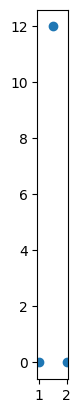

In [38]:
points = np.array(
    [
        [1, 0],
        [1.5, 12],
        [2, 0]
    ]
)
print(points)
fig, ax = plt.subplots()
ax.scatter(points[:, 0], points[:, 1])
ax.set_aspect(1)


In [40]:
def is_clockwise(p_1: tuple, p_2: tuple, p_3: tuple) -> bool:
    """Function to determine if three points make a clockwise or counter-clockwise turn.

    Parameters
    ----------
    p_1: tuple
        First point to be used to calculate turn.
    p_2: tuple
        Second point to be used to calculate turn.
    p_3: tuple
        Third point to be used to calculate turn.

    Returns
    -------
    boolean
        Indicator of whether turn is clockwise.
    """

    rotation_matrix = np.array(((p_1[0], p_1[1], 1), (p_2[0], p_2[1], 1), (p_3[0], p_3[1], 1)))
    return not np.linalg.det(rotation_matrix) > 0

def get_triangle_height(base_point_1: np.array, base_point_2: np.array, top_point: np.array) -> float:
    """Returns the height of a triangle defined by the input point vectors.
    Parameters
    ----------
    base_point_1: np.ndarray
        a base point of the triangle, eg: [5, 3].

    base_point_2: np.ndarray
        a base point of the triangle, eg: [8, 3].

    top_point: np.ndarray
        the top point of the triangle, defining the height from the line between the two base points, eg: [6,10].

    Returns
    -------
    Float
        The height of the triangle - ie the shortest distance between the top point and the line between the two base points.
    """

    # Height of triangle = A/b = ||AB X AC|| / ||AB||
    a_b = base_point_1 - base_point_2
    a_c = base_point_1 - top_point
    return np.linalg.norm(np.cross(a_b, a_c)) / np.linalg.norm(a_b)

def ferets(edges: np.ndarray) -> float:
    """Returns the minimum and maximum feret diameters for a grain.
    These are defined as the smallest and greatest distances between
    a pair of callipers that are rotating around a 2d object, maintaining
    contact at all times.

    Parameters
    ----------
    edge_points: list
        a list of the vector positions of the pixels comprising the edge of the
        grain. Eg: [[0, 0], [1, 0], [2, 1]]
    Returns
    -------
    min_feret: float
        the minimum feret diameter of the grain
    max_feret: float
        the maximum feret diameter of the grain"""

    # Sort the vectors by x coordinate then y coordinate
    sorted_indices = np.lexsort((edges[:, 1], edges[:, 0]))
    sorted = edges[sorted_indices]

    # Construct upper and lower hulls for the edge points.
    upper_hull = []
    lower_hull = []
    for point in sorted:
        print(point)
        while len(lower_hull) > 1 and is_clockwise(lower_hull[-2], lower_hull[-1], point):
            lower_hull.pop()
        lower_hull.append(point)
        while len(upper_hull) > 1 and not is_clockwise(upper_hull[-2], upper_hull[-1], point):
            upper_hull.pop()
        upper_hull.append(point)
    
    upper_hull = np.array(upper_hull)
    lower_hull = np.array(lower_hull)

    # Create list of contact vertices for calipers on the antipodal hulls
    contact_points = []
    upper_index = 0
    lower_index = len(lower_hull) - 1
    min_feret = None
    while upper_index < len(upper_hull) - 1 or lower_index > 0:
        contact_points.append([lower_hull[lower_index, :], upper_hull[upper_index, :]])
        # If we have reached the end of the upper hull, continute iterating over the lower hull
        if upper_index == len(upper_hull) - 1:
            lower_index -= 1
            small_feret = get_triangle_height(
                np.array(lower_hull[lower_index + 1, :]),
                np.array(lower_hull[lower_index, :]),
                np.array(upper_hull[upper_index, :]),
            )
            if min_feret is None or small_feret < min_feret:
                min_feret = small_feret
        # If we have reached the end of the lower hull, continue iterating over the upper hull
        elif lower_index == 0:
            upper_index += 1
            small_feret = get_triangle_height(
                np.array(upper_hull[upper_index - 1, :]),
                np.array(upper_hull[upper_index, :]),
                np.array(lower_hull[lower_index, :]),
            )
            if min_feret is None or small_feret < min_feret:
                min_feret = small_feret
        # Check if the gradient of the last point and the proposed next point in the upper hull is greater than the gradient
        # of the two corresponding points in the lower hull, if so, this means that the next point in the upper hull
        # will be encountered before the next point in the lower hull and vice versa.
        # Note that the calculation here for gradients is the simple delta upper_y / delta upper_x > delta lower_y / delta lower_x
        # however I have multiplied through the denominators such that there are no instances of division by zero. The
        # inequality still holds and provides what is needed.
        elif (upper_hull[upper_index + 1, 1] - upper_hull[upper_index, 1]) * (
            lower_hull[lower_index, 0] - lower_hull[lower_index - 1, 0]
        ) > (lower_hull[lower_index, 1] - lower_hull[lower_index - 1, 1]) * (
            upper_hull[upper_index + 1, 0] - upper_hull[upper_index, 0]
        ):
            # If the upper hull is encoutnered first, increment the iteration index for the upper hull
            # Also consider the triangle that is made as the two upper hull vertices are colinear with the caliper
            upper_index += 1
            small_feret = get_triangle_height(
                np.array(upper_hull[upper_index - 1, :]),
                np.array(upper_hull[upper_index, :]),
                np.array(lower_hull[lower_index, :]),
            )
            if min_feret is None or small_feret < min_feret:
                min_feret = small_feret
        else:
            # The next point in the lower hull will be encountered first, so increment the lower hull iteration index.
            lower_index -= 1
            small_feret = get_triangle_height(
                np.array(lower_hull[lower_index + 1, :]),
                np.array(lower_hull[lower_index, :]),
                np.array(upper_hull[upper_index, :]),
            )

            if min_feret is None or small_feret < min_feret:
                min_feret = small_feret

    contact_points = np.array(contact_points)

    # Find the minimum and maximum distance in the contact points
    max_feret = None
    for point_pair in contact_points:
        dist = np.sqrt((point_pair[0, 0] - point_pair[1, 0]) ** 2 + (point_pair[0, 1] - point_pair[1, 1]) ** 2)
        if max_feret is None or max_feret < dist:
            max_feret = dist

    return min_feret, max_feret

ferets(edges=points.copy())

[1. 0.]
[ 1.5 12. ]
[2. 0.]


(0.999133073092352, 12.010412149464313)

In [ ]:
def graham_scan(edges: list):
    """A function based on the Graham Scan algorithm that constructs a convex hull from points in 2D cartesian
    space. Ideally this algorithm will take O( n * log(n) ) time.

    Parameters
    ----------
    edges : list
        A python list of coordinates that make up the edges of the grain.

    Returns
    -------
    hull : list
        A list containing coordinates of the points in the hull.
    hull_indices : list
        A list containing the hull points indices inside the edges list. In other words, this provides a way to find
        the points from the hull inside the edges list that was passed.
    simplices : list
        A  list of tuples, each tuple representing a simplex of the convex hull. These simplices are sorted such
        that they follow each other in counterclockwise order.
    """
    # FIXME : Make this an isolated method
    # Find a point guaranteed to be on the hull. I find the bottom most point(s) and sort by x-position.
    min_y_index = None
    for index, point in enumerate(edges):
        if min_y_index is None or point[1] < edges[min_y_index][1]:
            min_y_index = index
        if point[1] == edges[min_y_index][1] and point[0] < edges[min_y_index][0]:
            min_y_index = index
    start_point = edges[min_y_index]
    # This does the same thing, but as a separate method and with Numpy Array rather than a lsit
    # self.get_start_point(edges)
    # Sort the points
    points_sorted_by_angle = sort_points(edges, start_point)

    # Remove starting point from the list so it's not added more than once to the hull
    start_point_index = points_sorted_by_angle.index(start_point)
    del points_sorted_by_angle[start_point_index]
    # Add start point and the first point sorted by angle. Both of these points will always be on the hull.
    hull = [start_point, points_sorted_by_angle[0]]

    # Iterate through each point, checking if this point would cause a clockwise rotation if added to the hull, and
    # if so, backtracking.
    for index, point in enumerate(points_sorted_by_angle[1:]):
        # Determine if the proposed point demands a clockwise rotation
        while self.is_clockwise(hull[-2], hull[-1], point) is True:
            # Delete the failed point
            del hull[-1]
            if len(hull) < 2:
                break
        # The point does not immediately cause a clockwise rotation.
        hull.append(point)

    # Get hull indices from original points array
    hull_indices = []
    for point in hull:
        hull_indices.append(edges.index(point))

    # Create simplices from the hull points
    simplices = []
    for index, value in enumerate(hull_indices):
        simplices.append((hull_indices[index - 1], value))

    return hull, hull_indices, simplices

In [1]:
def convex_hull(edges: list):

    hull, hull_indices, simplexes = graham_scan(edges)

    # Debug information
    plt.plot(edges)
    plt.plot(hull)
    print(f"points: {edges}")
    print(f"hull: {hull}")
    print(f"hull indexes: {hull_indices}")
    print(f"simplexes: {simplexes}")

    return hull, hull_indices, simplexes

In [3]:
edges = [[0, 0], [1, 0], [1, 1], [0, 1]]

hull, hull_indices, simplexes = convex_hull(edges)

NameError: name 'self' is not defined

In [176]:
ipytest.run()

======================================= test session starts ========================================
platform darwin -- Python 3.10.9, pytest-7.2.1, pluggy-1.0.0
Matplotlib: 3.6.3
Freetype: 2.6.1
rootdir: /Users/sylvi/Documents/TopoStats, configfile: pyproject.toml
plugins: xdist-3.1.0, regtest-1.5.0, mpl-0.16.1, cov-4.0.0, anyio-3.6.2
collected 4 items

t_84d2eb3ca77142dca8c23141b5ab671e.py ....                                                   [100%]WARNING: Failed to generate report: No data to report.



---------- coverage: platform darwin, python 3.10.9-final-0 ----------


======================================== 4 passed in 0.03s =========================================


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/coverage/report.py:114: CoverageWarning: Couldn't parse '/private/var/folders/sr/wjtfqr9s6x3bw1s647t649x80000gn/T/ipykernel_1345/1405329698.py': No source for code: '/private/var/folders/sr/wjtfqr9s6x3bw1s647t649x80000gn/T/ipykernel_1345/1405329698.py'. (couldnt-parse)
  coverage._warn(msg, slug="couldnt-parse")
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/coverage/report.py:114: CoverageWarning: Couldn't parse '/private/var/folders/sr/wjtfqr9s6x3bw1s647t649x80000gn/T/ipykernel_1345/2899503676.py': No source for code: '/private/var/folders/sr/wjtfqr9s6x3bw1s647t649x80000gn/T/ipykernel_1345/2899503676.py'. (couldnt-parse)
  coverage._warn(msg, slug="couldnt-parse")
/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/coverage/report.py:114: CoverageWarning: Couldn't parse '/private/var/folders/sr/wjtfqr9s6x3bw1s647t649x80000gn/T/ipykernel_1345/2993623086.py': No source for code: '/priv

<ExitCode.OK: 0>